## 计算信号突变位置

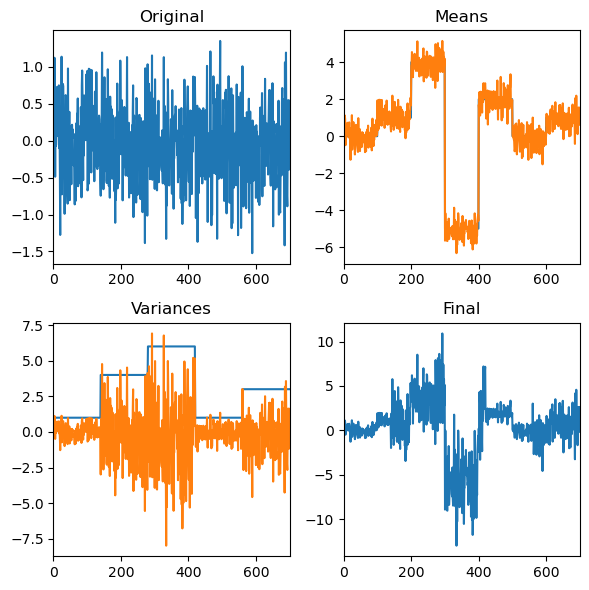

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子，确保结果的可重复性
np.random.seed(0)

# 定义常数
lr = 20

# 平均值和方差
mns = np.array([0, 1, 4, -5, 2, 0, 1])
vrs = np.array([1, 4, 6, 1, 3])

# 计算区域数量
nm = len(mns)
nv = len(vrs)

# 生成原始随机值
v = np.random.randn(lr * nm * nv) / 2


# 构造平均值变化
f = np.repeat(np.array([mns]), lr*nv,axis=0)
f=f.reshape(1,-1,order='F')
f = f.flatten()

 
# 构造方差变化
y = np.repeat(np.array([vrs]), lr*nm,axis=0)
y=y.reshape(1,-1,order='F')  # Ensure the size matches v by repeating for each mean segment
y= y.flatten()


# 计算最终信号
t = v * y + f

# 绘制图形
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.plot(v)
plt.title("Original")
plt.xlim([0, lr * nm * nv])

plt.subplot(2, 2, 2)
plt.plot(f)
plt.plot(v + f)
plt.title("Means")
plt.xlim([0, lr * nm * nv])

plt.subplot(2, 2, 3)
plt.plot(y)
plt.plot(v * y)
plt.title("Variances")
plt.xlim([0, lr * nm * nv])

plt.subplot(2, 2, 4)
plt.plot(t)
plt.title("Final")
plt.xlim([0, lr * nm * nv])

plt.tight_layout()
plt.show()


变化位置： [195, 300, 400, 500, 610, 700]


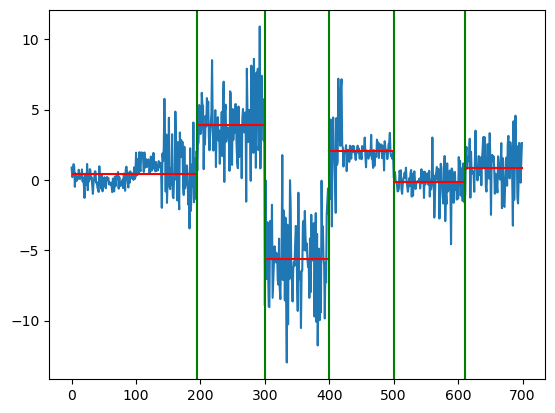

In [11]:
import ruptures as rpt
import matplotlib.pyplot as plt
from findchangepts import findchangepts 

# 使用findchangepts进行变化点检测
my_bkps = findchangepts(signal=t,n_bkps=6)
# 绘制数据
plt.plot(t)
print("变化位置：",my_bkps)
my_bkps.insert(0,0)

for i, pos in enumerate(my_bkps[:-1]):  # 遍历x_positions列表除了最后一个元素
    next_pos = my_bkps[i + 1]
    # 在指定位置添加竖线
    if i != 0:
        plt.axvline(x=pos, color='g')

    # 计算当前竖线和下一竖线之间数据点的均值
    mean_value = np.mean(t[pos:next_pos])
    
    # 在两个竖线之间添加表示均值的横线
    plt.hlines(mean_value, pos, next_pos, colors='r')

